In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import f_oneway, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

### Describe the Data

In [2]:
df = pd.read_csv('./cc_institution_details.csv')
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]
num_rows, num_cols

(3798, 63)

In [4]:
df.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3.798000e+03,3798.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3798.000000,3798.000000,3467.000000
mean,1898.500000,226063.790416,-91.030391,38.134044,4476.135334,23.435176,22.845656,22.484044,6.507447e+04,61282.189837,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.284360,232.557662,658.306028
std,1096.532489,105065.777685,15.684064,5.040303,7376.868923,10.615140,6.322818,4.770449,1.074379e+05,33295.027077,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.311303,156.960653,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,949.250000,155063.250000,-97.294767,34.299610,581.250000,17.300000,19.300000,21.500000,3.231125e+04,35830.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1898.500000,198075.000000,-86.828840,38.988143,1794.500000,21.300000,22.200000,22.500000,5.057850e+04,54025.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2847.750000,233745.000000,-79.966228,41.633128,5172.000000,26.500000,24.200000,24.600000,7.693025e+04,79310.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,137.600000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


### Remove Duplicates

In [5]:
df.duplicated().sum()
# No duplicate rows to drop 

0

### Remove unecessary cols

In [6]:
df.drop(['long_x', 'lat_y'], axis=1, inplace=True)
# Could argue that these columns are useless

### Convert column data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  site                                  3779 non-null   object 
 11  student_count    

In [8]:
print(set(df.dtypes))
df_float = df.select_dtypes(include='float64')
df_float.describe()
# df_float_cols = list(df_float.columns)
#value columns seem to have extreme outliers, percentile columns seem to have standardised these, might be better to use percentile columns

{dtype('int64'), dtype('float64'), dtype('O')}


,awards_per_value,awards_per_state_value,awards_per_natl_value,ft_pct,med_sat_value,med_sat_percentile,aid_value,aid_percentile,endow_value,endow_percentile,...,vsa_enroll_elsewhere_after6_first,vsa_grad_after4_transfer,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,cohort_size
count,3798.000000,3798.000000,3798.000000,3794.000000,1337.000000,1337.000000,3797.000000,3797.000000,2.323000e+03,2323.000000,...,279.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3467.000000
mean,23.435176,22.845656,22.484044,71.092198,1059.889304,49.801047,7960.445878,49.991046,3.254405e+04,49.948773,...,9.925090,51.186667,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,658.306028
std,10.615140,6.322818,4.770449,25.056818,132.819927,29.006569,6419.658196,28.922664,1.233173e+05,28.951584,...,4.075698,16.562107,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,961.782580
min,0.500000,3.200000,16.500000,3.800000,666.000000,0.000000,294.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000
25%,17.300000,19.300000,21.500000,49.800000,974.000000,25.000000,4018.000000,25.000000,1.431000e+03,25.000000,...,7.200000,43.200000,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,131.000000
50%,21.300000,22.200000,22.500000,77.000000,1040.000000,49.000000,5207.000000,50.000000,5.466000e+03,50.000000,...,9.400000,52.100000,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,356.000000
75%,26.500000,24.200000,24.600000,93.900000,1123.000000,75.000000,9343.000000,75.000000,1.949050e+04,75.000000,...,11.950000,61.375000,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,782.500000
max,137.600000,59.900000,32.800000,100.000000,1534.000000,100.000000,41580.000000,100.000000,2.505435e+06,100.000000,...,33.700000,88.000000,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,16229.000000


array([[<Axes: title={'center': 'awards_per_value'}>,
        <Axes: title={'center': 'aid_value'}>],
       [<Axes: title={'center': 'retain_value'}>,
        <Axes: title={'center': 'cohort_size'}>]], dtype=object)

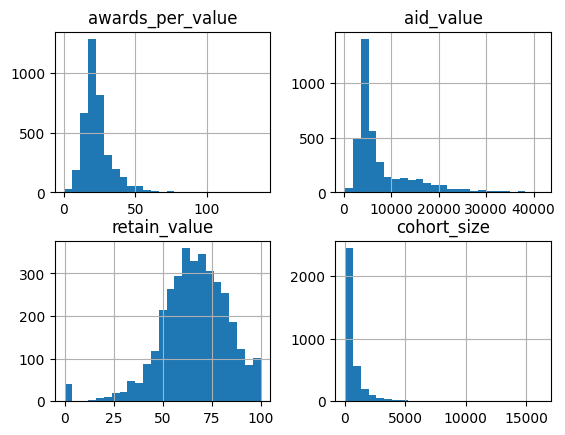

In [9]:
df.hist(column=['awards_per_value', 'aid_value', 'retain_value', 'cohort_size'], bins=25)
# To demonstrate outliers and right skewness of some variables

In [10]:
df_object = df.select_dtypes(include='object')
object_col_list = list(df_object.columns)
cat_col_list = object_col_list[3:5]
object_col_list = object_col_list[6:]

for col in object_col_list:
    df[f'{col}_flag'] = np.where(df[col].isna(), 0, 1)
df.drop(columns=object_col_list, axis=1, inplace=True)

for var in cat_col_list:
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_')], axis=1)
# Made flag columns for binary object cols e.g. hbcu and flagship
# Made dummy columns for categorical cols e.g. level anf control


In [11]:
df.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'basic',
       'student_count', 'awards_per_value', 'awards_per_state_value',
       'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value',
       'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value',
       'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
   

### Missing Data

In [12]:
null_cols_per_row = list(df.isnull().sum(axis=1))
[[x, null_cols_per_row.count(x), round((x/num_cols)*100,2)] for x in set(null_cols_per_row)]
#Each row is the number of cols missing in a row, second is the number of occurances, and third number is % of cols missing
#Consider dropping rows with >50% cols missing

[[0, 238, 0.0],
 [2, 31, 3.17],
 [4, 1, 6.35],
 [8, 8, 12.7],
 [12, 1, 19.05],
 [17, 1039, 26.98],
 [19, 934, 30.16],
 [21, 1126, 33.33],
 [22, 13, 34.92],
 [23, 88, 36.51],
 [24, 27, 38.1],
 [26, 180, 41.27],
 [27, 1, 42.86],
 [28, 107, 44.44],
 [31, 4, 49.21]]

In [13]:
col_percent_missing = df.isnull().sum() * 100 / len(df)
col_count_missing = df.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': col_percent_missing,
                                 'count_missing': col_count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(20)

,column_name,percent_missing,count_missing
vsa_grad_after6_transfer,vsa_grad_after6_transfer,92.890995,3528
vsa_grad_after4_transfer,vsa_grad_after4_transfer,92.890995,3528
vsa_enroll_elsewhere_after6_transfer,vsa_enroll_elsewhere_after6_transfer,92.890995,3528
vsa_enroll_after6_transfer,vsa_enroll_after6_transfer,92.890995,3528
vsa_grad_elsewhere_after6_transfer,vsa_grad_elsewhere_after6_transfer,92.890995,3528
vsa_grad_elsewhere_after4_transfer,vsa_grad_elsewhere_after4_transfer,92.890995,3528
vsa_enroll_elsewhere_after4_transfer,vsa_enroll_elsewhere_after4_transfer,92.890995,3528
vsa_enroll_after4_transfer,vsa_enroll_after4_transfer,92.890995,3528
vsa_enroll_after4_first,vsa_enroll_after4_first,92.654028,3519
vsa_enroll_elsewhere_after6_first,vsa_enroll_elsewhere_after6_first,92.654028,3519


In [14]:
no_missing = list(df.columns[df.isna().any() == False])
print(no_missing)
vsa_missing_cols = list(df.columns[df.isnull().mean() > 0.90])
print(vsa_missing_cols)

['index', 'unitid', 'chronname', 'city', 'state', 'basic', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'fte_value', 'fte_percentile', 'state_sector_ct', 'carnegie_ct', 'hbcu_flag', 'flagship_flag', 'site_flag', 'similar_flag', 'counted_pct_flag', 'nicknames_flag', 'level_2-year', 'level_4-year', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']
['vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_tra

In [15]:
# df_vsa = df[df['vsa_grad_after4_transfer'].isna() == False]
df.drop(vsa_missing_cols, axis=1, inplace=True)
# Could argue that these columns are useless

In [16]:
null_cols_per_row = list(df.isnull().sum(axis=1))
[[x, null_cols_per_row.count(x), round((x/num_cols)*100,2)] for x in set(null_cols_per_row)]
#Each row is the number of cols missing in a row, second is the number of occurances, and third number is % of cols missing
#Now vsa cols have been dropped, largest no of missing cols for a row is 14 (22% of their data missing)

[[0, 1285, 0.0],
 [2, 965, 3.17],
 [4, 1128, 6.35],
 [5, 13, 7.94],
 [6, 88, 9.52],
 [7, 27, 11.11],
 [9, 180, 14.29],
 [10, 1, 15.87],
 [11, 107, 17.46],
 [14, 4, 22.22]]

### Correlation between variables

C:\Users\sarin\AppData\Local\Temp\ipykernel_26672\1055735293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs());


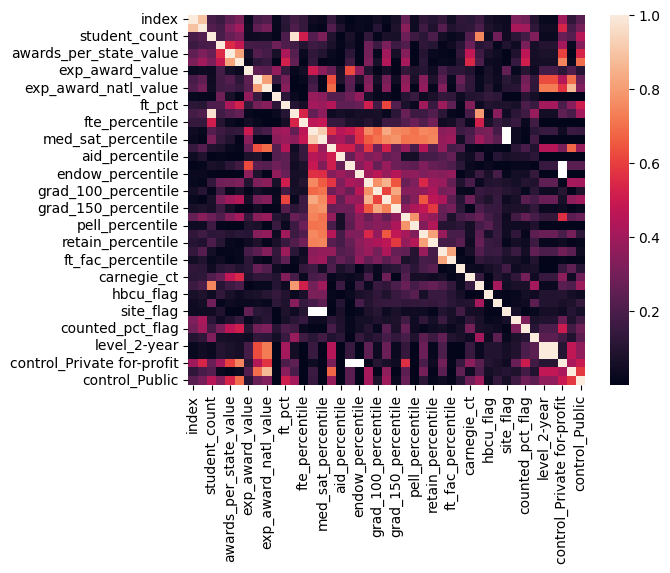

In [17]:
sns.heatmap(df.corr().abs());

In [18]:
au_corr = df.corr().abs()
upper = au_corr.where(np.triu(np.ones(au_corr.shape), k=1).astype(bool))
df_corr = upper.stack().sort_values(ascending=False).reset_index(name='corr')
df_corr.rename(columns={"level_0": "var1", "level_1": "var2"}, inplace=True);

C:\Users\sarin\AppData\Local\Temp\ipykernel_26672\3163652535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  au_corr = df.corr().abs()


In [19]:
df_corr.head(10)
# Some vars very closely related e.g. vsa_grad_after4_transfer & vsa_grad_after6_transfer, and med_sat_value & med_sat_percentile, obviously
# If building a model, could use one instead of both and reduce overfitting

,var1,var2,corr
0,level_2-year,level_4-year,1.000000
1,student_count,fte_value,0.974339
2,med_sat_value,med_sat_percentile,0.920985
3,index,unitid,0.891251
4,exp_award_natl_value,control_Private not-for-profit,0.869761
5,grad_100_value,grad_150_value,0.853982
6,grad_100_percentile,grad_150_percentile,0.824847
7,med_sat_value,grad_150_value,0.824688
8,ft_fac_value,ft_fac_percentile,0.820059
9,awards_per_state_value,awards_per_natl_value,0.818052


In [20]:
df_corr.tail(10)

,var1,var2,corr
889,med_sat_percentile,counted_pct_flag,0.000140
890,fte_percentile,level_4-year,0.000115
891,fte_percentile,level_2-year,0.000115
892,exp_award_natl_value,fte_percentile,0.000110
893,state_sector_ct,level_4-year,0.000074
894,state_sector_ct,level_2-year,0.000074
895,aid_percentile,control_Public,0.000056
896,awards_per_natl_value,aid_percentile,0.000038
897,fte_percentile,control_Private not-for-profit,0.000018
898,awards_per_natl_value,pell_percentile,0.000004


## Question 1: What effect do an institution's characteristics have on their graduation rate?

In [21]:
print(df['grad_100_value'].isna().sum())
print(df['grad_150_value'].isna().sum())
print(df[(df['grad_100_value'].isna() == True) & (df['grad_150_value'].isna() == True)].shape[0])
df_grad_clean = df.dropna(subset=['grad_100_value'])
# 331 rows missing grad_100 and grad_150 cols, missings in both cols (and in percentile ones) correlate

331
331
331


In [22]:
df_corr[(df_corr['var1'] == 'grad_100_value') | (df_corr['var2'] == 'grad_100_value')]
# grad_100_value correlates strongly with: med_sat_value, aid_value, retain_value, ft_pct, 
# Surprisingly no correlation with cohort_size
# As expected grad 100 and grad 150 highly correlated = 0.854
# Could build a model that would predict one and not include the other as a var - model will predict graduation rate overall
# Could build a model that predicts one using the other

,var1,var2,corr
5,grad_100_value,grad_150_value,0.853982
15,grad_100_value,grad_100_percentile,0.771771
18,med_sat_value,grad_100_value,0.751950
38,med_sat_percentile,grad_100_value,0.656782
40,grad_100_value,grad_150_percentile,0.645231
50,aid_value,grad_100_value,0.575879
58,grad_100_value,retain_value,0.540277
67,ft_pct,grad_100_value,0.509987
98,endow_value,grad_100_value,0.421828
104,grad_100_value,control_Private not-for-profit,0.412118


C:\Users\sarin\AppData\Local\Temp\ipykernel_26672\1876103611.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="grad_100_value", y="cohort_size", data=df_grad_clean, palette="Dark2", s=20)


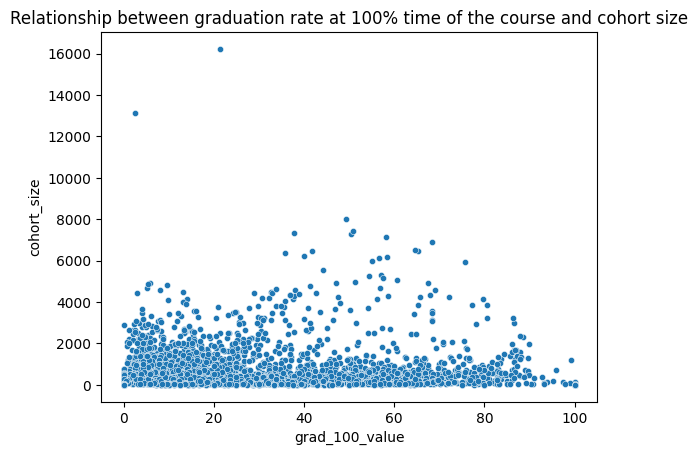

In [23]:
sns.scatterplot(x="grad_100_value", y="cohort_size", data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between graduation rate at 100% time of the course and cohort size")
plt.show()
# Awful plot, supports the weak correlation (0.030278) we see above

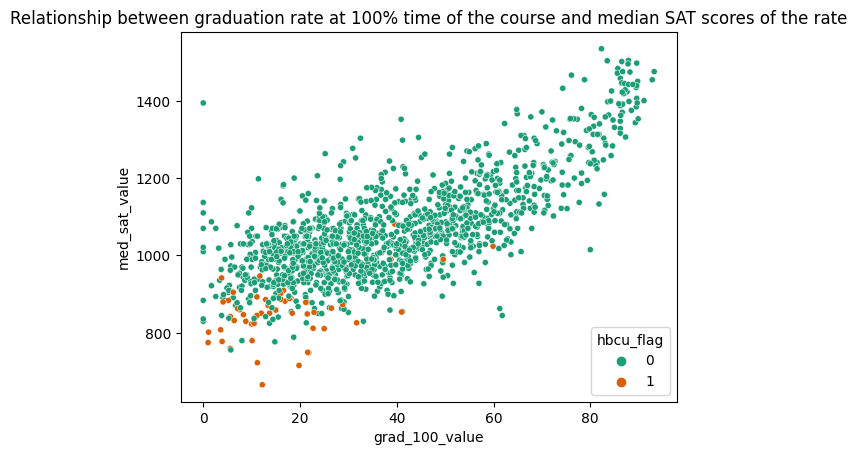

In [24]:
sns.scatterplot(x="grad_100_value", y="med_sat_value", hue='hbcu_flag', data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between graduation rate at 100% time of the course and median SAT scores of the rate")
plt.show()
# Seems that control has a way of splitting up the data, looking at 2 corners of the grap, same with hbcu_flag

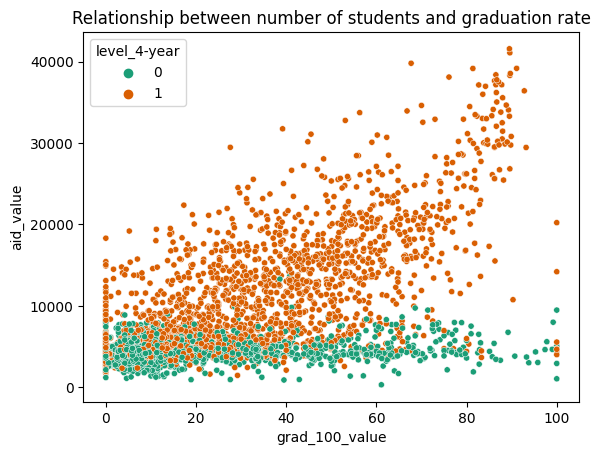

In [25]:
sns.scatterplot(x="grad_100_value", y="aid_value", hue='level_4-year', data=df_grad_clean, palette="Dark2", s=20)
plt.title("Relationship between number of students and graduation rate")
plt.show()

In [26]:
# Try a model first that doesn't use categorical variables
random.seed(234)
num_vars = df_grad_clean[['grad_100_value', 'med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value']]
df_dropna = num_vars.dropna(axis=0)
X = df_dropna[['med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value']]
y = df_dropna['grad_100_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=12)
grad_100_model = LinearRegression()
grad_100_model.fit(X_train, y_train)

y_test_preds = grad_100_model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_preds)}")
# 1285 rows left when dropping NAs in variables used, a third of the original dataset
# 0.72 R suqaured score which is a fairly good model, it's saying that 72% of variance in predictions can be explained by the model
# aid_value and retain_value has outliers as we saw before

R2 Score: 0.722754611405394
Mean Squared Error: 119.64492113881381


In [27]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
# preds_vs_act.head()
preds_vs_act

,actual,preds,diff
0,38.9,37.938936,0.961064
1,0.0,21.427819,-21.427819
2,70.9,61.839693,9.060307
3,20.5,34.829136,-14.329136
4,65.2,59.462562,5.737438
...,...,...,...
420,36.8,46.712731,-9.912731
421,35.0,27.269685,7.730315
422,17.7,14.711290,2.988710
423,14.3,20.797709,-6.497709


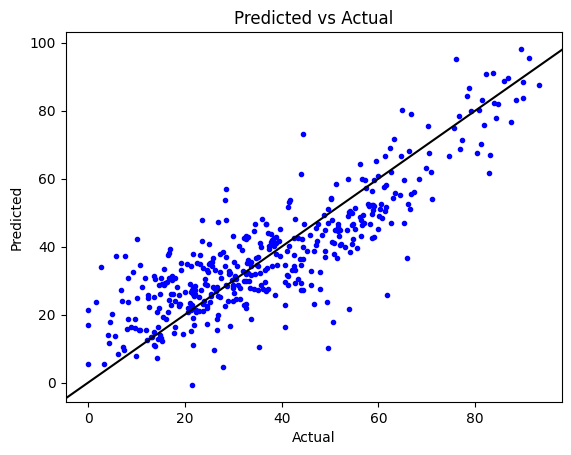

In [28]:
# We can plot how far our predictions are from the actual values compared to the predicted values
# High R2 value can be seen by the points being close to the black line
# For lower graduation rates (between  0-30), tended to overpredict, but from 30 onwards in tended to underpredict the actual values
# Homoscedasticity - equal variance of points about the line

plt.plot(preds_vs_act['actual'], preds_vs_act['preds'], 'bo', markersize = 3);
plt.axline((0, 0), slope=1, color="black")
plt.title("Predicted vs Actual")
plt.xlabel('Actual');
plt.ylabel('Predicted');


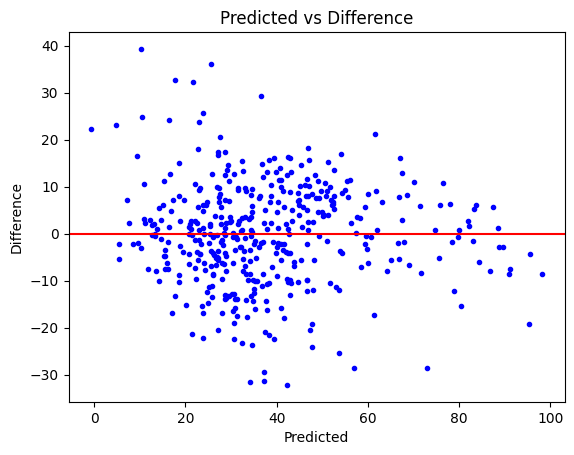

In [29]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo', markersize = 3);
plt.axhline(0, color='r')
plt.title("Predicted vs Difference")
plt.xlabel('Predicted');
plt.ylabel('Difference');
# evenly spread out about the line = equally likely to underpredicted as we are overpredict
# Homoscedasticity
# Can miss miss graduation rate by up to 40

In [30]:
# Now we explore the effect of categorical variables.
StatesGroupLists = df_grad_clean.groupby('state')['grad_100_value'].apply(list)
AnovaResults = f_oneway(*StatesGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])
# Want to check for correlation between state and grad 100 val
# Looks like there's no correlation, F stats is low, but p value is tiny (<0.05) therefore suggests that the correlation is statistically 
# significant
# Probably because there are too many categories within this variable - 52 of them

F_onewayResult(statistic=6.499571860621484, pvalue=1.1333458086297473e-39)
P-Value for Anova is:  1.1333458086297473e-39


In [31]:
ControlGroupLists = df_grad_clean.groupby('control_Private not-for-profit')['grad_100_value'].apply(list)
AnovaResults = f_oneway(*ControlGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])
# Want to check for correlation between control and grad 100 val
# Looks like there's no correlation, F stats is higher, but p value is even tinier (<0.05) therefore suggests that the correlation is 
# statistically significant

F_onewayResult(statistic=708.8991823696218, pvalue=2.906367573237671e-142)
P-Value for Anova is:  2.906367573237671e-142


In [32]:
ControlGroupLists = df_grad_clean.groupby('control_Public')['grad_100_value'].apply(list)
AnovaResults = f_oneway(*ControlGroupLists)
print(AnovaResults)
print('P-Value for Anova is: ', AnovaResults[1])
# Want to check for correlation between control and grad 100 val
# Looks like there's no correlation, F stats is higher, but p value is even tinier therefore (<0.05) therefore suggests that the 
# correlation is statistically significant

F_onewayResult(statistic=697.5968193990866, pvalue=3.2095602218549383e-140)
P-Value for Anova is:  3.2095602218549383e-140


In [33]:
# Now try a model that usse categorical variables, specifically control since the corr above showed ~0.45
random.seed(234)
num_cat_vars = df_grad_clean[['grad_100_value', 'med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
df_dropna = num_cat_vars.dropna(axis=0)
print(df_dropna.shape[0])
X2 = df_dropna[['med_sat_value', 'aid_value', 'retain_value', 'ft_pct', 'endow_value',   'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
y2 = df_dropna['grad_100_value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.33, random_state=12)
grad_100_model_cat = LinearRegression()
grad_100_model_cat.fit(X_train2, y_train2)

y2_test_preds = grad_100_model_cat.predict(X_test2)
print(f"R2 Score: {r2_score(y_test2, y2_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test2, y2_test_preds)}")
# Same number of rows left (1285) when dropping NAs in variables used, a third of the original dataset
# 0.74 R suqaured score so MARGINALLY better than previous model and given that R2 adds a penalty for every variable added, this means 
# that adding the extra variables had enough of a benefit to outweigh the penalty
# aid_value and retain_value has outliers as we saw before

1285
R2 Score: 0.7407053941706672
Mean Squared Error: 111.89828196397242


In [34]:
preds_vs_act2 = pd.DataFrame(np.hstack([y_test2.values.reshape(y_test2.size,1), y2_test_preds.reshape(y_test2.size,1)]))
preds_vs_act2.columns = ['actual', 'preds']
preds_vs_act2['diff'] = preds_vs_act2['actual'] - preds_vs_act2['preds']
# preds_vs_act.head()
preds_vs_act2

,actual,preds,diff
0,38.9,40.602104,-1.702104
1,0.0,31.142236,-31.142236
2,70.9,61.864511,9.035489
3,20.5,33.417183,-12.917183
4,65.2,61.195154,4.004846
...,...,...,...
420,36.8,44.880486,-8.080486
421,35.0,29.271090,5.728910
422,17.7,10.225274,7.474726
423,14.3,23.538746,-9.238746


## Question 2: Does full time faculty have an effect on student retention rate?

In [35]:
q2_df = df[['retain_value', 'ft_fac_value', 'retain_percentile', 'ft_fac_percentile', 'level_4-year', 'level_2-year', 'control_Private for-profit', 'control_Private not-for-profit', 'control_Public']]
q2_df.describe()
# More missing in retain_value

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
count,3535.000000,3785.000000,3535.000000,3785.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,66.231853,45.107477,49.226591,49.473448,0.615850,0.384150,0.261190,0.328594,0.410216
std,17.033907,24.726902,29.175248,29.014201,0.486458,0.486458,0.439341,0.469764,0.491938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.100000,25.700000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.900000,41.500000,49.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,78.100000,63.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
col_percent_missing = q2_df.isnull().sum() * 100 / len(df)
col_count_missing = q2_df.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': q2_df.columns,
                                 'percent_missing': col_percent_missing,
                                 'count_missing': col_count_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df.head(20)

,column_name,percent_missing,count_missing
retain_value,retain_value,6.924697,263
retain_percentile,retain_percentile,6.924697,263
ft_fac_value,ft_fac_value,0.342285,13
ft_fac_percentile,ft_fac_percentile,0.342285,13
level_4-year,level_4-year,0.000000,0
level_2-year,level_2-year,0.000000,0
control_Private for-profit,control_Private for-profit,0.000000,0
control_Private not-for-profit,control_Private not-for-profit,0.000000,0
control_Public,control_Public,0.000000,0


In [37]:
q2_df.dropna(subset=['retain_value', 'ft_fac_value'], inplace=True)
q2_df.shape[0]

C:\Users\sarin\AppData\Local\Temp\ipykernel_26672\3990187652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_df.dropna(subset=['retain_value', 'ft_fac_value'], inplace=True)


3526

array([[<Axes: title={'center': 'retain_value'}>,
        <Axes: title={'center': 'ft_fac_value'}>]], dtype=object)

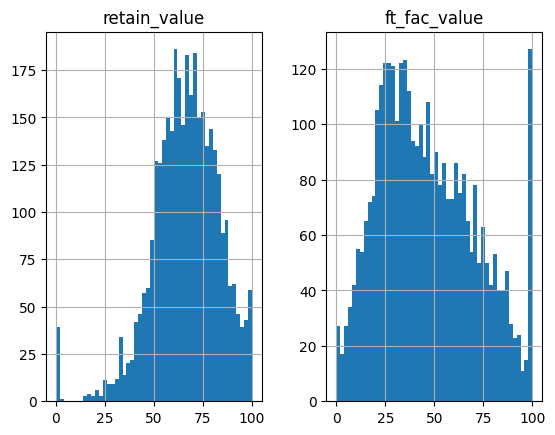

In [38]:
q2_df.hist(column=['retain_value', 'ft_fac_value'], bins=50)
# retain_value and ft_fac_value have outliers (bottom and top of the graphs respectively) which could affect their corr

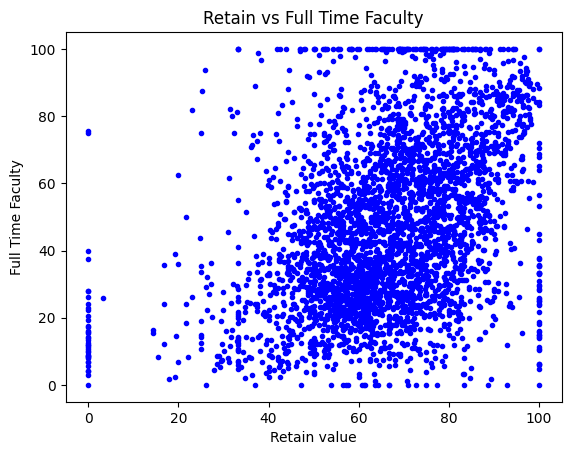

In [39]:
plt.plot(q2_df['retain_value'], q2_df['ft_fac_value'], 'bo', markersize = 3);
plt.title("Retain vs Full Time Faculty")
plt.xlabel('Retain value');
plt.ylabel('Full Time Faculty');
# Looks like the 0 and 100 values on either end aren't reliable, they form a "box"

In [40]:
q2_df['retain_value'].corr(q2_df['ft_fac_value'])
# Weak correlation, I wonder if removing outliers would make a difference?

0.3826807844228234

In [41]:
q2_df['ft_fac_value'].value_counts().sort_values(ascending=False).head(20)
# Backs up histogram in that 115 rows have 100 ft_fac_value and then after that, the rest of the rows relate to the interquartile range 
# 27 rows have 0 value but it fits with the curve so we'll leave it for now

100.0    113
33.3      25
0.0       23
50.0      19
66.7      17
25.0      15
75.0      15
28.6      14
24.0      14
23.3      14
26.7      13
20.0      13
33.9      13
36.4      12
20.5      11
37.5      11
40.0      11
34.8      11
34.6      11
48.9      11
Name: ft_fac_value, dtype: int64

In [42]:
q2_df_ft = q2_df[q2_df['ft_fac_value'] != 100]
q2_df_ft

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,63.1,82.8,17.0,89.0,1,0,0,0,1
1,80.2,92.4,70.0,98.0,1,0,0,0,1
2,37.5,67.2,2.0,71.0,1,0,0,1,0
3,81.0,65.5,72.0,56.0,1,0,0,0,1
4,62.2,67.0,15.0,58.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3792,33.3,28.6,1.0,37.0,0,1,0,0,1
3793,33.3,10.7,1.0,3.0,1,0,0,1,0
3794,74.4,44.4,47.0,39.0,1,0,0,1,0
3795,77.8,29.6,81.0,74.0,1,0,1,0,0


In [43]:
q2_df['retain_value'].value_counts().sort_values(ascending=False).head(20)
# Again, backs up histogram - 52 rows have 100 ft_fac_value and then after that, the rest of the rows relate to the interquartile range 
# For this var, the 0 val is the culprit - 39 rows have 0 value and only 1 of the other top 20 rows by values have a retain_value lower than 50

100.0    52
66.7     44
0.0      39
50.0     39
75.0     27
33.3     27
83.3     22
60.0     22
58.3     21
62.5     19
78.6     18
60.4     16
78.9     16
69.2     16
80.0     16
61.4     15
62.8     15
71.7     15
71.9     14
59.2     14
Name: retain_value, dtype: int64

In [44]:
q2_df_no_out = q2_df_ft[(q2_df_ft['retain_value'] != 0) & (q2_df_ft['retain_value'] != 100)]
q2_df_no_out

,retain_value,ft_fac_value,retain_percentile,ft_fac_percentile,level_4-year,level_2-year,control_Private for-profit,control_Private not-for-profit,control_Public
0,63.1,82.8,17.0,89.0,1,0,0,0,1
1,80.2,92.4,70.0,98.0,1,0,0,0,1
2,37.5,67.2,2.0,71.0,1,0,0,1,0
3,81.0,65.5,72.0,56.0,1,0,0,0,1
4,62.2,67.0,15.0,58.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3792,33.3,28.6,1.0,37.0,0,1,0,0,1
3793,33.3,10.7,1.0,3.0,1,0,0,1,0
3794,74.4,44.4,47.0,39.0,1,0,0,1,0
3795,77.8,29.6,81.0,74.0,1,0,1,0,0


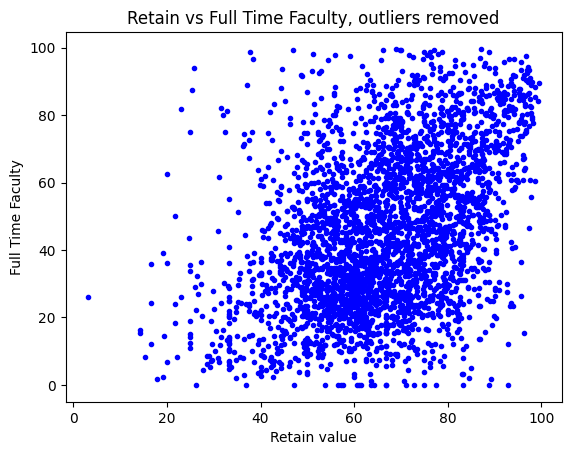

In [45]:
plt.plot(q2_df_no_out['retain_value'], q2_df_no_out['ft_fac_value'], 'bo', markersize = 3);
plt.title("Retain vs Full Time Faculty, outliers removed")
plt.xlabel('Retain value');
plt.ylabel('Full Time Faculty');
# Looks like the 0 and 100 values on either end aren't reliable, they form a "box"

In [46]:
corr_test_output = pearsonr(q2_df_no_out['retain_value'], q2_df_no_out['ft_fac_value'])
print(f"Correlation coefficient: {corr_test_output[0]}")
print(f"Two tailed p-value: {corr_test_output[1]}")
# Removing outliers improved correlation of the 2 vars, but not by much, from 0.38 to 0.42
# Pearsons r is not robust to outliers though so likely that score accuracy improved by removing them
# p value for T score is >0.05 therefore statistically significant. Can reject null hypothesis and accent the alternative hypothesis 
# that there is a statistically significant association between retain_value and ft_fac_value

Correlation coefficient: 0.4207763806103621
Two tailed p-value: 8.900805096197867e-143


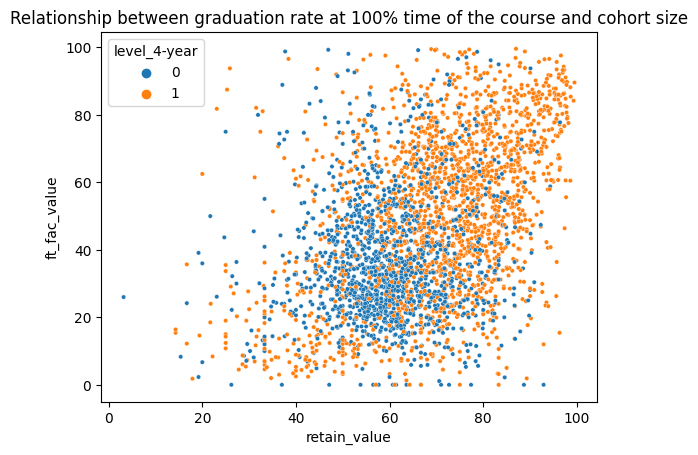

In [47]:
sns.scatterplot(x="retain_value", y="ft_fac_value", data=q2_df_no_out, hue="level_4-year", s=10)
plt.title("Relationship between graduation rate at 100% time of the course and cohort size")
plt.show()

In [48]:
model_vars = []
model_r2_score = []
model_mse = []

In [49]:
# Model: X variables - ft_fac_value
random.seed(234)
X3 = q2_df_no_out['ft_fac_value'].values.reshape(-1, 1)
y3 = q2_df_no_out['retain_value'].values.reshape(-1, 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size= 0.33, random_state=12)
retain_model = LinearRegression()
retain_model.fit(X_train3, y_train3)

y3_test_preds = retain_model.predict(X_test3)
print(f"R2 Score: {r2_score(y_test3, y3_test_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test3, y3_test_preds)}")

model_vars.append('[\'ft_fac_value\']')
model_r2_score.append(r2_score(y_test3, y3_test_preds))
model_mse.append(mean_squared_error(y_test3, y3_test_preds))

R2 Score: 0.19123395153598366
Mean Squared Error: 195.2211639075491


In [50]:
def retain_model_fn(cat_list):
    random.seed(234)
    num_cat_vars = q2_df_no_out[cat_list]
    df_dropna = num_cat_vars.dropna(axis=0)
    X = df_dropna[cat_list[1:]]
    y = df_dropna['retain_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=12)
    ln_model = LinearRegression()
    ln_model.fit(X_train, y_train)

    y_test_preds = ln_model.predict(X_test)
    
    model_vars.append(f"{cat_list[1:]}")
    model_r2_score.append(r2_score(y_test, y_test_preds))
    model_mse.append(mean_squared_error(y_test, y_test_preds))

In [51]:
cat_list = [
['retain_value', 'ft_fac_value', 'level_4-year'],
['retain_value', 'ft_fac_value', 'control_Private for-profit', 'control_Public'],
['retain_value', 'ft_fac_value', 'level_4-year', 'control_Private for-profit', 'control_Public']]

for list in cat_list:
    retain_model_fn(list)

In [52]:
print(model_vars)
print(model_r2_score)
print(model_mse)

["['ft_fac_value']", "['ft_fac_value', 'level_4-year']", "['ft_fac_value', 'control_Private for-profit', 'control_Public']", "['ft_fac_value', 'level_4-year', 'control_Private for-profit', 'control_Public']"]
[0.19123395153598366, 0.22870258435649904, 0.2399879754809502, 0.24828433900151192]
[195.2211639075491, 186.17692902264338, 183.45284435730483, 181.45025566585304]


In [53]:
model_dict = {'model_vars': model_vars, 'r2_score': model_r2_score, 'mse': model_mse}
retain_models_df = pd.DataFrame(model_dict)
retain_models_df
# R2 score improves throughout, but only marginally overall therefore adding in categorical variables hasn't improved the relationship 
# between retain_value and ft_fac_value. 'control' seems to be better than 'level' and the combination of the 2 is the best.

,model_vars,r2_score,mse
0,['ft_fac_value'],0.191234,195.221164
1,"['ft_fac_value', 'level_4-year']",0.228703,186.176929
2,"['ft_fac_value', 'control_Private for-profit',...",0.239988,183.452844
3,"['ft_fac_value', 'level_4-year', 'control_Priv...",0.248284,181.450256
